In [1]:
#illustrating the unsorted search algorithm, i.e. grover algorithm

#This is for 2 qubits

In [118]:
%matplotlib inline
from qiskit import *
from qiskit.visualization import *
from qiskit.tools.monitor import *
import random, time
import numpy as np

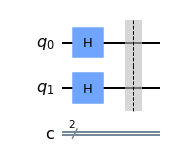

In [134]:
#constructing the init circuit, 4 states and we want to search for |01>. I need to first get the superposition state for the 4 
#states i.e. 00, 01, 10 and 11. This can be done by applying Hadamard gate to both the qubits.

q = QuantumRegister(2,name='q')
c = ClassicalRegister(2, name = 'c')

circ_init = QuantumCircuit(q,c)
circ_init.h([q[0],q[1]])
circ_init.barrier()
circ_init.draw(output = 'mpl')

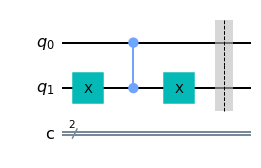

In [135]:
#Now we need to form an oracle such that, The value which we want to search is (01), flipped down. initial probability of 
#all the 4 states is 0.25. Now we will flip the amplitude of the |01> state. 

circ_oracle = QuantumCircuit(q,c)
circ_oracle.x(q[1])
circ_oracle.cz(q[0],q[1])
circ_oracle.x(q[1])
circ_oracle.barrier()
circ_oracle.draw(output='mpl')

In [121]:
circ2 = circ_init + circ_oracle
back = Aer.get_backend('statevector_simulator')
job = execute(circ2,back)
result = job.result().get_statevector(circ2)
np.around(result,2)

array([ 0.5+0.j, -0.5+0.j,  0.5+0.j,  0.5+0.j])

In [122]:
#Now, the oracle is ready Next step is to make the amplification circuit.
U = [[-1/2,1/2,1/2,1/2],
     [1/2,-1/2,1/2,1/2],
     [1/2,1/2,-1/2,1/2],
     [1/2,1/2,1/2,-1/2]]



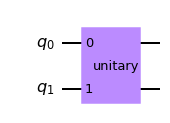

In [123]:
qc = QuantumCircuit(2)
qc.unitary(U, [0,1])
qc.draw(output = 'mpl')

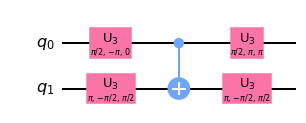

In [124]:
trans_qc = transpile(qc, basis_gates=['cx','u3'])
trans_qc.draw(output ='mpl')

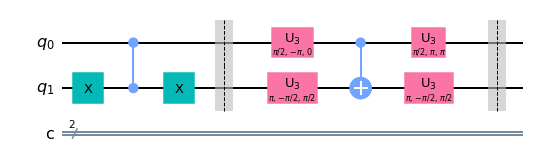

In [125]:
grover_circ = circ_oracle + trans_qc
grover_circ.barrier()
grover_circ.draw(output = 'mpl')

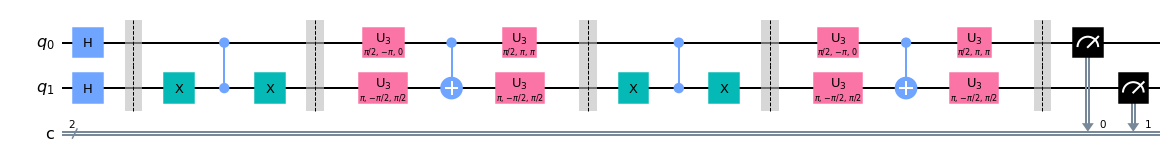

In [126]:
circ = circ_init + grover_circ + grover_circ
circ.measure(q,c)
circ.draw(output = 'mpl')

In [127]:
backend = Aer.get_backend('qasm_simulator')
job = execute(circ, backend, shots=100)
result = job.result().get_counts(circ)
print(result)

{'10': 23, '11': 33, '01': 23, '00': 21}


In [128]:
from qiskit.providers.ibmq import least_busy

provider = IBMQ.load_account()
# We choose the least busy device
backend = least_busy(provider.backends(operational = True, simulator=False, status_msg='active',
                                       filters=lambda x: x.configuration().n_qubits >= 2)) 
print("We are using...",backend)
print("It has",backend.status().pending_jobs,"pending jobs")
# We send both circuits at a time
job2 = execute(circ, backend=backend, shots = 100)
job_monitor(job2)


ibmqfactory.load_account:WARNING:2021-07-07 01:15:22,295: Credentials are already in use. The existing account in the session will be replaced.


We are using... ibmqx2
It has 6 pending jobs
Job Status: job has successfully run


{'00': 20, '01': 27, '10': 20, '11': 33}


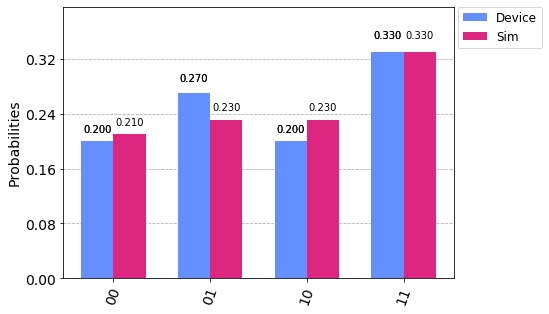

In [129]:
result1 = job2.result()
counts = result1.get_counts(circ)
print(counts)
plot_histogram([counts,result], legend = ['Device','Sim'])

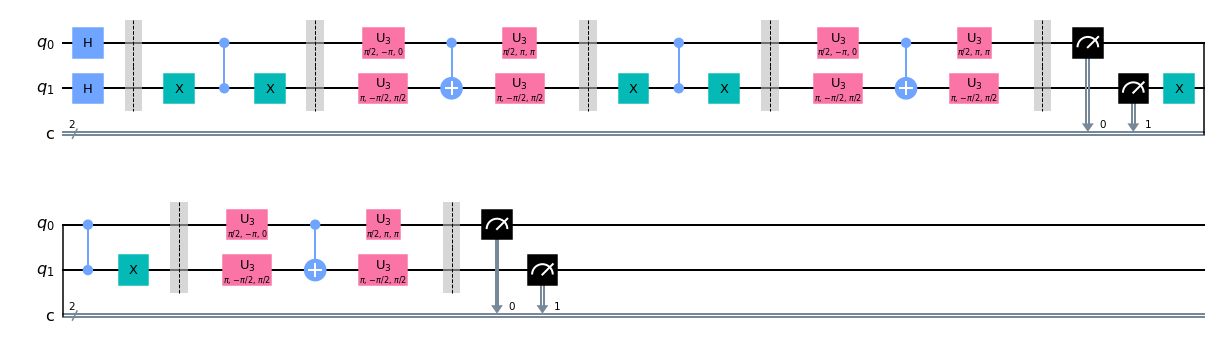

In [130]:
circ = circ +grover_circ
circ.measure(q,c)
circ.draw(output = 'mpl')


In [131]:
backend = least_busy(provider.backends(operational = True, simulator=False, status_msg='active',
                                       filters=lambda x: x.configuration().n_qubits >= 2)) 
print("We are using...",backend)
print("It has",backend.status().pending_jobs,"pending jobs")
# We send both circuits at a time
job3 = execute(circ, backend=backend, shots = 100)
job_monitor(job3)

We are using... ibmqx2
It has 4 pending jobs
Job Status: job has successfully run


{'00': 24, '01': 29, '10': 28, '11': 19}


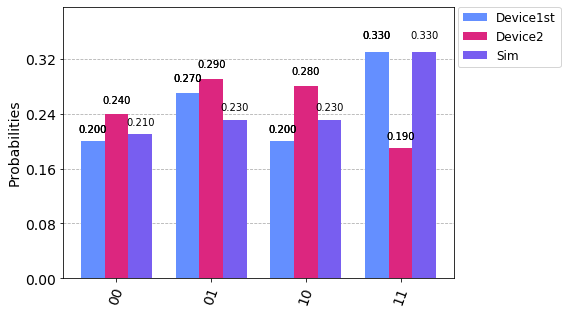

In [132]:
result2 = job3.result()
counts1 = result2.get_counts(circ)
print(counts1)
plot_histogram([counts,counts1,result], legend = ['Device1st','Device2','Sim'])

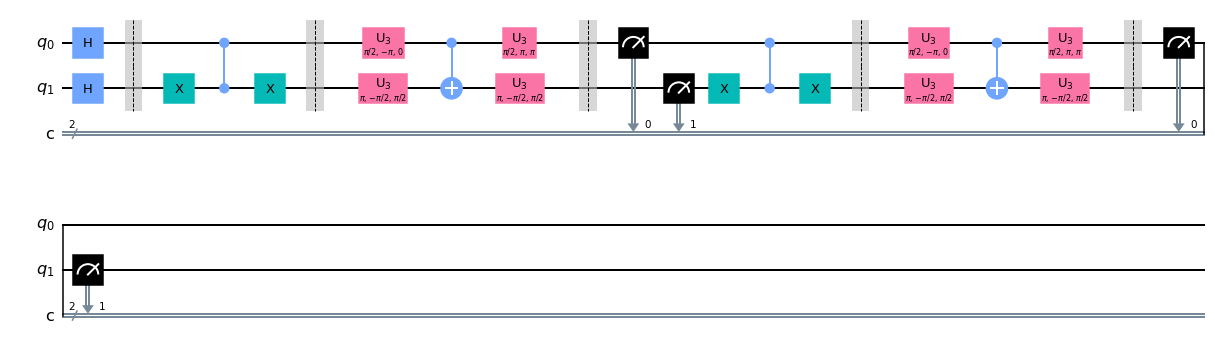

In [117]:
circ.draw(output='mpl')